In [55]:
# pip install xgboost -q

In [56]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier


In [57]:
# load dataset
df = sns.load_dataset('iris')   
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


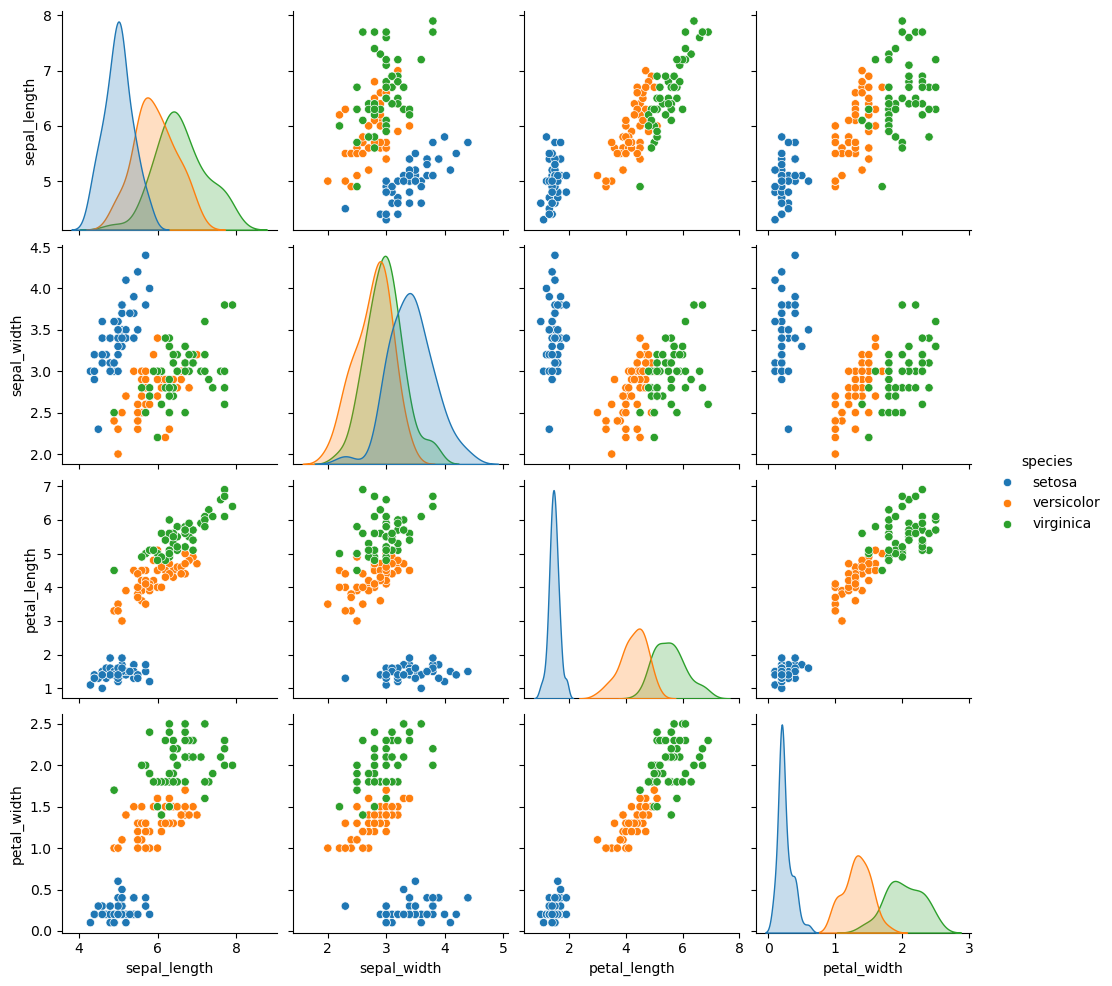

In [58]:
# plot dataset as scatter plot
sns.pairplot(df, hue='species')
plt.show()

In [59]:
# split the data in X and y
X = df.drop('species', axis=1)
y = df['species']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
%%time
# train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# make predictions
y_pred_dt = dt_model.predict(X_test)

# evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\n")

Decision Tree Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


CPU times: user 14.5 ms, sys: 1.51 ms, total: 16 ms
Wall time: 14.7 ms


In [61]:
%%time
# train the random forest model 
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# predict using random forest
y_pred_rf = rf.predict(X_test)

# evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")

Random Forest Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


CPU times: user 168 ms, sys: 3.93 ms, total: 172 ms
Wall time: 174 ms


In [62]:
%%time
# train the gradient boosting model


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train_enc)

y_pred_xgb = xgb.predict(X_test)

# Decode predictions back to original labels (optional)
y_pred_labels = le.inverse_transform(y_pred_xgb)


print("Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))
print(classification_report(y_test_enc, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_xgb))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: user 547 ms, sys: 32.8 ms, total: 579 ms
Wall time: 86.4 ms


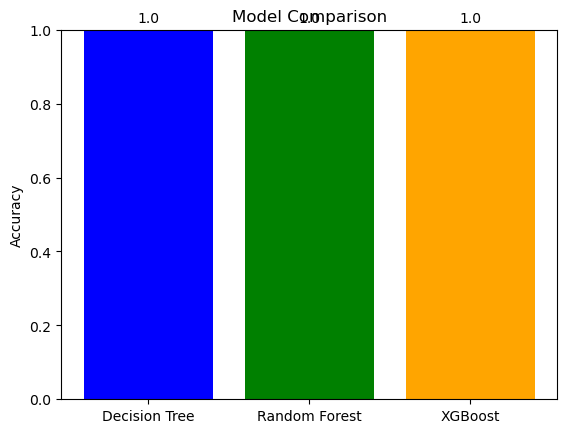

In [63]:
# make a bar plot to compare the models anfd their accuracies
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test_enc, y_pred_xgb)]
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center')
plt.show()


In [65]:
# load dataset diamonds from seaborn 
df = sns.load_dataset('diamonds')
